===== Dataset Overview =====
Total records: 50000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 35 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Ticket ID                           50000 non-null  object 
 1   Created At                          50000 non-null  object 
 2   Created Date                        50000 non-null  object 
 3   Responded At                        50000 non-null  object 
 4   Resolved At                         50000 non-null  object 
 5   Priority                            50000 non-null  object 
 6   Status                              50000 non-null  object 
 7   SLA Breach                          50000 non-null  bool   
 8   Escalation Level                    37476 non-null  object 
 9   Ticket Type                         50000 non-null  object 
 10  Root Cause Category                 50000 non-null  obj

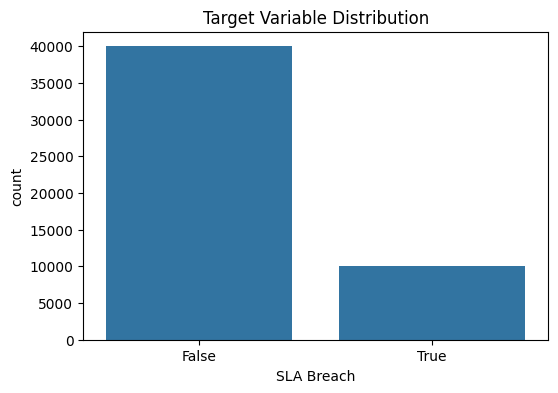


===== Missing Values per Column =====
Escalation Level    12524
dtype: int64

===== Sample Categorical Feature Value Counts =====

Column: Priority
Priority
P1    12690
P4    12604
P2    12355
P3    12351
Name: count, dtype: int64

Column: Impact Level
Impact Level
Medium      12679
Critical    12482
Low         12454
High        12385
Name: count, dtype: int64

Column: Ticket Type
Ticket Type
Problem     12682
Incident    12556
Request     12393
Change      12369
Name: count, dtype: int64

Column: Root Cause Category
Root Cause Category
Human Error    8422
Other          8363
Network        8348
Software       8291
Hardware       8289
Security       8287
Name: count, dtype: int64

Column: Technician Skill Level
Technician Skill Level
Junior    16910
Mid       16599
Senior    16491
Name: count, dtype: int64

Column: Customer Segment
Customer Segment
Consumer      17354
Enterprise    16332
SME           16314
Name: count, dtype: int64

Column: Contract Type
Contract Type
Premium     16

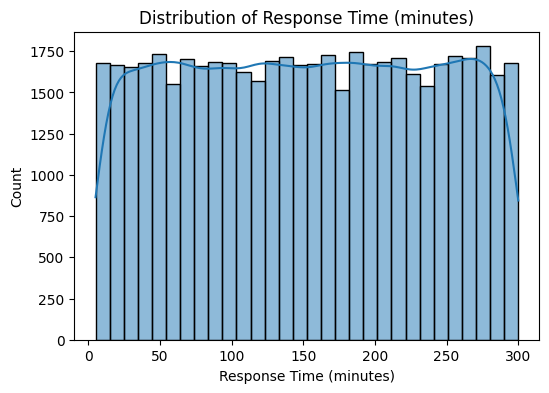

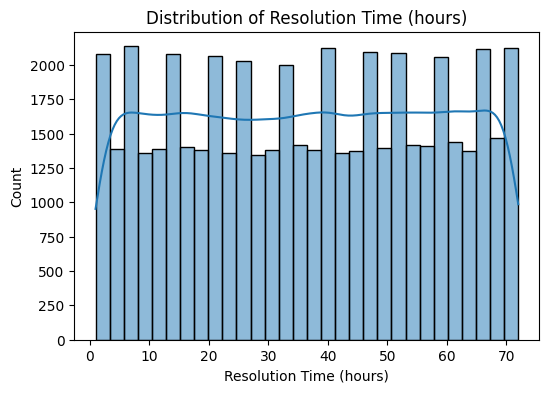

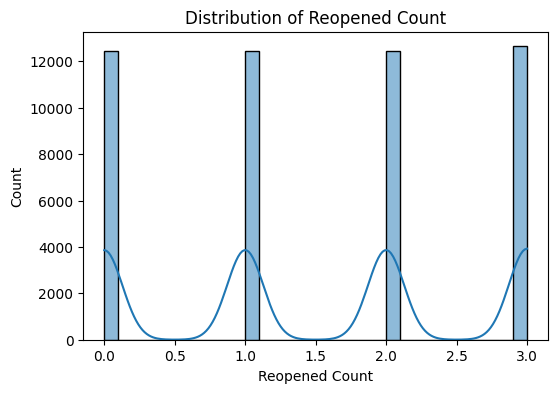

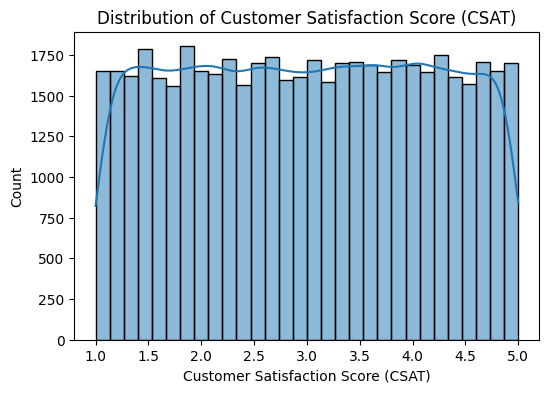

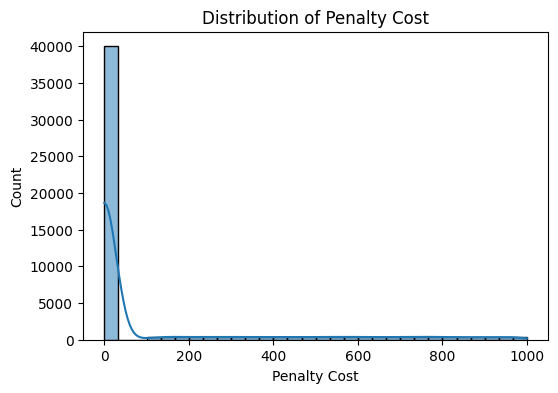


===== Correlation Matrix =====
SLA Breach                            1.000000
Penalty Cost                          0.882775
Response Time (minutes)               0.006813
Customer Satisfaction Score (CSAT)    0.001566
Resolution Time (hours)               0.001543
Reopened Count                       -0.000304
Name: SLA Breach, dtype: float64


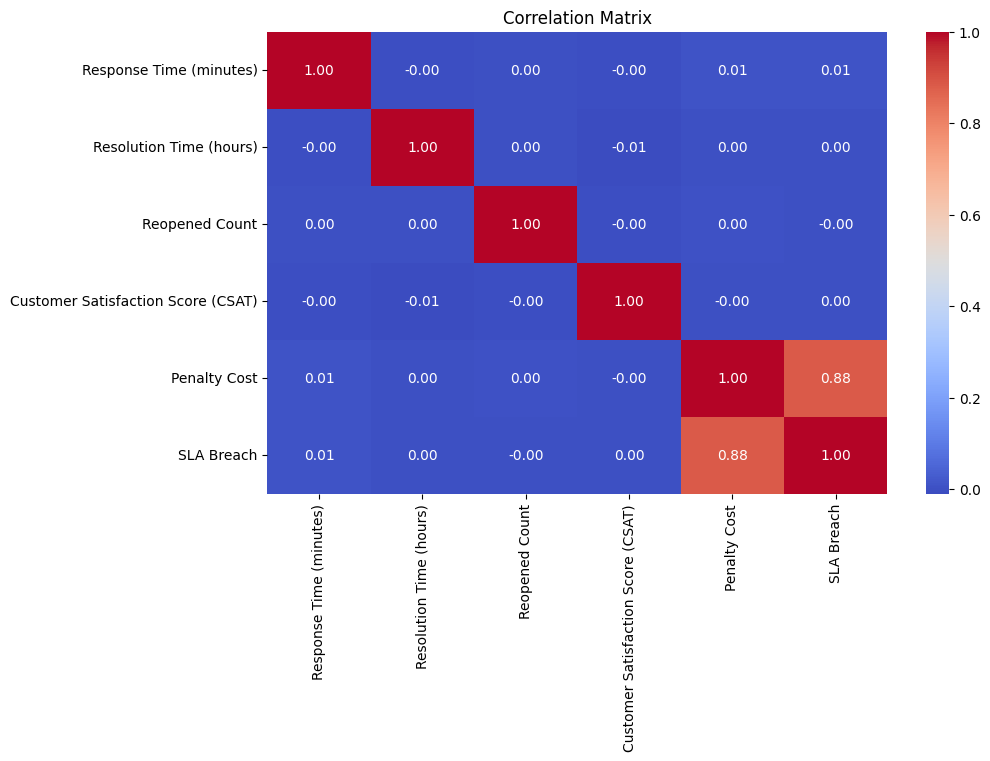


===== Target Rate by Categorical Features =====

Priority - mean SLA Breach rate:
Priority
P2    0.205018
P3    0.204113
P4    0.195890
P1    0.195193
Name: SLA Breach, dtype: float64

Impact Level - mean SLA Breach rate:
Impact Level
Low         0.205717
Critical    0.199167
High        0.197901
Medium      0.197255
Name: SLA Breach, dtype: float64

Ticket Type - mean SLA Breach rate:
Ticket Type
Incident    0.201975
Change      0.201957
Request     0.198741
Problem     0.197366
Name: SLA Breach, dtype: float64

Root Cause Category - mean SLA Breach rate:
Root Cause Category
Other          0.207701
Hardware       0.204970
Software       0.200096
Human Error    0.198528
Network        0.195017
Security       0.193677
Name: SLA Breach, dtype: float64

Technician Skill Level - mean SLA Breach rate:
Technician Skill Level
Mid       0.203085
Junior    0.199645
Senior    0.197259
Name: SLA Breach, dtype: float64

Customer Segment - mean SLA Breach rate:
Customer Segment
Consumer      0.200

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset - update the path as needed
df = pd.read_csv(r'C:\Users\kau75421\ITSM SLA Optimzers\data\raw\itsm_sla_tickets_dataset_extended.csv')

print("===== Dataset Overview =====")
print(f"Total records: {len(df)}\n")
print(df.info())
print("\n")

# Target variable
target_col = 'SLA Breach'  # Expected True/False or 1/0

print(f"===== Target Variable Distribution ({target_col}) =====")
print(df[target_col].value_counts())
print("\nPercentage distribution:")
print(df[target_col].value_counts(normalize=True) * 100)

# Plot target distribution
plt.figure(figsize=(6,4))
sns.countplot(x=target_col, data=df)
plt.title("Target Variable Distribution")
plt.show()

# Check missing values
print("\n===== Missing Values per Column =====")
missing = df.isnull().sum()
print(missing[missing > 0].sort_values(ascending=False))

# Select columns for quick analysis (update as per your dataset)
categorical_features = [
    'Priority', 'Impact Level', 'Ticket Type', 'Root Cause Category',
    'Technician Skill Level', 'Customer Segment', 'Contract Type', 'Escalation Level'
]

numeric_features = [
    'Response Time (minutes)', 'Resolution Time (hours)',
    'Reopened Count', 'Customer Satisfaction Score (CSAT)', 'Penalty Cost'
]

print("\n===== Sample Categorical Feature Value Counts =====")
for col in categorical_features:
    if col in df.columns:
        print(f"\nColumn: {col}")
        print(df[col].value_counts().head(10))

print("\n===== Numeric Feature Summary Statistics =====")
print(df[numeric_features].describe())

# Plot numeric feature distributions
for col in numeric_features:
    if col in df.columns:
        plt.figure(figsize=(6,4))
        sns.histplot(df[col].dropna(), kde=True, bins=30)
        plt.title(f"Distribution of {col}")
        plt.show()

# Correlation matrix for numeric features and target
print("\n===== Correlation Matrix =====")
corr = df[numeric_features + [target_col]].corr()
print(corr[target_col].sort_values(ascending=False))

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Group target rate by categorical features (to find feature impact)
print("\n===== Target Rate by Categorical Features =====")
for col in categorical_features:
    if col in df.columns:
        group = df.groupby(col)[target_col].mean().sort_values(ascending=False)
        print(f"\n{col} - mean {target_col} rate:")
        print(group)

# Summary
print("\n===== Summary =====")
print("""
- Target variable distribution shows the imbalance ratio.
- Missing values found in above columns.
- Check distributions to detect outliers or skew.
- Correlations hint at important numeric features.
- Target rates by categories suggest impactful variables.

Next steps:
- Handle missing values.
- Encode categorical variables.
- Address class imbalance if needed.
- Proceed to model training with chosen features.
""")


In [29]:

# Assuming df is your DataFrame

def handle_missing_values(df):
    # 1. Escalation Level (categorical, ~25% missing)
    # Justification: Missing escalation info likely means "No escalation",
    # so fill with 'Unknown' to retain missing info explicitly.
    df['Escalation Level'] = df['Escalation Level'].fillna('Unknown')

    # 2. If any other categorical columns have missing (none in your data now),
    # best to fill with mode or 'Unknown' category similarly.
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    categorical_cols.remove('Escalation Level')  # Already handled

    for col in categorical_cols:
        if df[col].isnull().sum() > 0:
            mode_val = df[col].mode()[0]
            df[col] = df[col].fillna(mode_val)
            print(f"Filled missing in categorical column '{col}' with mode: {mode_val}")

    # 3. Numeric columns - no missing as per your data, but generic handling:
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

    for col in numeric_cols:
        if df[col].isnull().sum() > 0:
            median_val = df[col].median()
            df[col] = df[col].fillna(median_val)
            print(f"Filled missing in numeric column '{col}' with median: {median_val}")

    # 4. Dates or timestamps: (Assuming none missing as per your data)
    # If missing, you could fill with a placeholder date or drop rows depending on importance.

    # Confirm no missing remain
    missing_after = df.isnull().sum()
    missing_after = missing_after[missing_after > 0]

    if len(missing_after) == 0:
        print("✅ All missing values handled successfully!")
    else:
        print("⚠️ Missing values remain in columns:")
        print(missing_after)

    return df

# Call the function
df_clean = handle_missing_values(df)


✅ All missing values handled successfully!


In [30]:
def clip_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)
    return df

outlier_cols = ['Response Time (minutes)', 'Resolution Time (hours)', 'Penalty Cost']
for col in outlier_cols:
    df = clip_outliers(df, col)

print("✅ Outliers clipped.")


✅ Outliers clipped.


In [31]:
# skew Correction to remocve skewness in numeric features
from scipy.stats import skew
import numpy as np

for col in outlier_cols:
    sk = skew(df[col])
    print(f"{col}: skew = {sk:.2f}")
    if abs(sk) > 1:
        df[col] = np.log1p(df[col])
        print(f"✅ Applied log1p to {col}")


Response Time (minutes): skew = -0.00
Resolution Time (hours): skew = -0.01
Penalty Cost: skew = nan


In [32]:
df

,Ticket ID,Created At,Created Date,Responded At,Resolved At,Priority,Status,SLA Breach,Escalation Level,Ticket Type,...,Resolution Time (hours),MTTR (hours),MTBF (days),SLA Compliance Flag,Penalty Cost,Customer Satisfaction Score (CSAT),Ticket Source,Impact Level,Change Request Linked,Problem Ticket Linked
0,TKT000001,2025-03-18 09:55:25,2025-03-18,2025-03-18 11:27:25,2025-03-20 21:27:25,P1,Reopened,False,Level 2,Request,...,58,15.63,58.03,met,0,4.33,Automated Monitoring,Critical,Yes,No
1,TKT000002,2025-03-18 02:47:44,2025-03-18,2025-03-18 05:42:44,2025-03-20 18:42:44,P4,Reopened,False,Level 3,Request,...,61,41.50,45.27,met,0,2.94,Email,Low,No,Yes
2,TKT000003,2025-03-05 18:24:24,2025-03-05,2025-03-05 20:21:24,2025-03-06 10:21:24,P3,Resolved,False,Unknown,Change,...,14,1.24,88.45,met,0,1.33,Email,Medium,No,No
3,TKT000004,2025-04-04 03:23:27,2025-04-04,2025-04-04 07:22:27,2025-04-06 05:22:27,P3,Closed,False,Level 1,Incident,...,46,30.24,75.85,met,0,2.73,Portal,High,Yes,Yes
4,TKT000005,2025-06-18 18:56:46,2025-06-18,2025-06-18 23:50:46,2025-06-20 18:50:46,P1,Reopened,False,Level 1,Request,...,43,33.65,79.08,met,0,4.95,Portal,Low,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,TKT049996,2025-03-13 06:16:32,2025-03-13,2025-03-13 11:11:32,2025-03-15 23:11:32,P2,Reopened,True,Level 1,Problem,...,60,29.10,36.27,breached,0,3.59,Phone,Critical,No,Yes
49996,TKT049997,2025-06-11 05:13:52,2025-06-11,2025-06-11 06:25:52,2025-06-11 09:25:52,P3,In Progress,True,Level 3,Problem,...,3,25.29,17.94,breached,0,1.03,Portal,Medium,No,Yes
49997,TKT049998,2024-12-29 00:01:10,2024-12-29,2024-12-29 04:21:10,2024-12-30 10:21:10,P2,Open,False,Level 1,Problem,...,30,9.63,42.20,met,0,2.58,Email,Low,No,Yes
49998,TKT049999,2025-04-11 22:07:38,2025-04-11,2025-04-11 22:27:38,2025-04-14 14:27:38,P4,Reopened,True,Level 1,Incident,...,64,18.24,57.00,breached,0,3.39,Automated Monitoring,Low,Yes,No


In [33]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

def handle_timeseries_data(df, datetime_columns=None, reference_date_col=None):
    """
    Properly handle time series data for ITSM SLA optimization
    
    Parameters:
    df: DataFrame containing the data
    datetime_columns: List of datetime column names
    reference_date_col: Reference date column for calculating durations (e.g., 'created_date')
    """
    
    df_processed = df.copy()
    
    # Auto-detect datetime columns if not specified
    if datetime_columns is None:
        datetime_columns = []
        for col in df.columns:
            if df[col].dtype == 'object':
                # Try to convert to datetime
                try:
                    pd.to_datetime(df[col].head(100), errors='raise')
                    datetime_columns.append(col)
                except:
                    continue
    
    print("Detected/Specified datetime columns:", datetime_columns)
    
    # Convert datetime columns to proper datetime format
    for col in datetime_columns:
        print(f"\nProcessing datetime column: {col}")
        
        # Convert to datetime
        df_processed[col] = pd.to_datetime(df_processed[col], errors='coerce')
        
        # Extract temporal features
        df_processed = extract_temporal_features(df_processed, col)
    
    # Calculate ITSM-specific time-based metrics
    df_processed = calculate_itsm_time_metrics(df_processed, datetime_columns, reference_date_col)
    
    # Handle business hours and SLA calculations
    df_processed = calculate_business_time_features(df_processed, datetime_columns)
    
    return df_processed

def extract_temporal_features(df, datetime_col):
    """
    Extract comprehensive temporal features from datetime column
    """
    
    print(f"  Extracting temporal features from {datetime_col}...")
    
    # Basic temporal features
    df[f'{datetime_col}_year'] = df[datetime_col].dt.year
    df[f'{datetime_col}_month'] = df[datetime_col].dt.month
    df[f'{datetime_col}_day'] = df[datetime_col].dt.day
    df[f'{datetime_col}_hour'] = df[datetime_col].dt.hour
    df[f'{datetime_col}_minute'] = df[datetime_col].dt.minute
    df[f'{datetime_col}_dayofweek'] = df[datetime_col].dt.dayofweek  # 0=Monday, 6=Sunday
    df[f'{datetime_col}_dayofyear'] = df[datetime_col].dt.dayofyear
    df[f'{datetime_col}_week'] = df[datetime_col].dt.isocalendar().week
    df[f'{datetime_col}_quarter'] = df[datetime_col].dt.quarter
    
    # Business-relevant features
    df[f'{datetime_col}_is_weekend'] = (df[datetime_col].dt.dayofweek >= 5).astype(int)
    df[f'{datetime_col}_is_monday'] = (df[datetime_col].dt.dayofweek == 0).astype(int)
    df[f'{datetime_col}_is_friday'] = (df[datetime_col].dt.dayofweek == 4).astype(int)
    
    # Time of day categories (important for ITSM)
    df[f'{datetime_col}_time_category'] = df[datetime_col].dt.hour.apply(categorize_time_of_day)
    
    # Business hours (assuming 9 AM to 5 PM)
    df[f'{datetime_col}_is_business_hours'] = (
        (df[datetime_col].dt.hour >= 9) & 
        (df[datetime_col].dt.hour < 17) & 
        (df[datetime_col].dt.dayofweek < 5)
    ).astype(int)
    
    # Holiday detection (basic - you may want to use a holiday library)
    df[f'{datetime_col}_is_month_end'] = (
        df[datetime_col].dt.day >= df[datetime_col].dt.days_in_month - 2
    ).astype(int)
    
    # Cyclical encoding for periodic features (important for ML models)
    df[f'{datetime_col}_hour_sin'] = np.sin(2 * np.pi * df[datetime_col].dt.hour / 24)
    df[f'{datetime_col}_hour_cos'] = np.cos(2 * np.pi * df[datetime_col].dt.hour / 24)
    df[f'{datetime_col}_dayofweek_sin'] = np.sin(2 * np.pi * df[datetime_col].dt.dayofweek / 7)
    df[f'{datetime_col}_dayofweek_cos'] = np.cos(2 * np.pi * df[datetime_col].dt.dayofweek / 7)
    df[f'{datetime_col}_month_sin'] = np.sin(2 * np.pi * df[datetime_col].dt.month / 12)
    df[f'{datetime_col}_month_cos'] = np.cos(2 * np.pi * df[datetime_col].dt.month / 12)
    
    return df

def categorize_time_of_day(hour):
    """
    Categorize hour into meaningful time periods for ITSM
    """
    if 6 <= hour < 12:
        return 1  # Morning
    elif 12 <= hour < 18:
        return 2  # Afternoon
    elif 18 <= hour < 22:
        return 3  # Evening
    else:
        return 4  # Night

def calculate_itsm_time_metrics(df, datetime_columns, reference_date_col=None):
    """
    Calculate ITSM-specific time metrics
    """
    
    print("\nCalculating ITSM-specific time metrics...")
    
    # Common ITSM datetime columns (adjust based on your data)
    common_itsm_columns = {
        'created_date': 'creation',
        'resolved_date': 'resolution', 
        'closed_date': 'closure',
        'first_response_date': 'first_response',
        'last_updated_date': 'last_update',
        'due_date': 'due',
        'escalated_date': 'escalation'
    }
    
    # Find matching columns
    available_columns = {}
    for col in datetime_columns:
        col_lower = col.lower()
        for pattern, label in common_itsm_columns.items():
            if pattern in col_lower or label in col_lower:
                available_columns[label] = col
                break
    
    print(f"  Available ITSM datetime columns: {available_columns}")
    
    # Calculate durations between key events
    if 'creation' in available_columns and 'resolution' in available_columns:
        df['resolution_time_hours'] = (
            df[available_columns['resolution']] - df[available_columns['creation']]
        ).dt.total_seconds() / 3600
        
        df['resolution_time_days'] = df['resolution_time_hours'] / 24
        
        print("  ✓ Calculated resolution time")
    
    if 'creation' in available_columns and 'first_response' in available_columns:
        df['first_response_time_hours'] = (
            df[available_columns['first_response']] - df[available_columns['creation']]
        ).dt.total_seconds() / 3600
        
        print("  ✓ Calculated first response time")
    
    if 'creation' in available_columns and 'due' in available_columns:
        df['time_to_due_hours'] = (
            df[available_columns['due']] - df[available_columns['creation']]
        ).dt.total_seconds() / 3600
        
        # SLA breach indicator
        if 'resolution' in available_columns:
            df['sla_breached'] = (
                df[available_columns['resolution']] > df[available_columns['due']]
            ).astype(int)
            
            df['sla_breach_hours'] = np.where(
                df['sla_breached'] == 1,
                (df[available_columns['resolution']] - df[available_columns['due']]).dt.total_seconds() / 3600,
                0
            )
        
        print("  ✓ Calculated SLA metrics")
    
    # Age of ticket (if still open)
    if reference_date_col and reference_date_col in available_columns:
        current_time = datetime.now()
        df['ticket_age_hours'] = (
            current_time - df[available_columns[reference_date_col]]
        ).dt.total_seconds() / 3600
        
        df['ticket_age_days'] = df['ticket_age_hours'] / 24
        
        print("  ✓ Calculated ticket age")
    
    return df

def calculate_business_time_features(df, datetime_columns):
    """
    Calculate business time features (excluding weekends and holidays)
    """
    
    print("\nCalculating business time features...")
    
    # Business days calculation
    for col in datetime_columns:
        if col in df.columns:
            # Calculate business days from a reference point (e.g., start of year)
            year_start = pd.Timestamp(f'{datetime.now().year}-01-01')
            df[f'{col}_business_days_from_year_start'] = df[col].apply(
                lambda x: np.busday_count(year_start.date(), x.date()) if pd.notna(x) else np.nan
            )
    
    # Peak hours indicator (typically high ticket volume times)
    peak_hours = [9, 10, 11, 14, 15, 16]  # Adjust based on your organization
    for col in datetime_columns:
        if col in df.columns:
            df[f'{col}_is_peak_hours'] = df[col].dt.hour.isin(peak_hours).astype(int)
    
    return df

def create_time_based_aggregations(df, datetime_col, target_col=None, group_by_period='D'):
    """
    Create time-based aggregations for trend analysis
    """
    
    print(f"\nCreating time-based aggregations for {datetime_col}...")
    
    if target_col:
        # Group by time period and calculate statistics
        time_agg = df.groupby(pd.Grouper(key=datetime_col, freq=group_by_period)).agg({
            target_col: ['count', 'mean', 'std', 'min', 'max']
        }).reset_index()
        
        # Flatten column names
        time_agg.columns = [f'{datetime_col}_period'] + [f'{target_col}_{stat}' for stat in ['count', 'mean', 'std', 'min', 'max']]
        
        # Merge back to original dataframe
        df[f'{datetime_col}_period'] = df[datetime_col].dt.floor(group_by_period)
        df = df.merge(time_agg, on=f'{datetime_col}_period', how='left', suffixes=('', '_period_agg'))
        
        print(f"  ✓ Added period aggregations for {target_col}")
    
    return df

# Main execution
print("="*60)
print("TIME SERIES DATA PROCESSING FOR ITSM SLA OPTIMIZATION")
print("="*60)

# Define your datetime columns (adjust based on your actual column names)
datetime_cols = [
    'created_date', 'resolved_date', 'closed_date', 
    'first_response_date', 'due_date', 'last_updated_date'
]

# Filter to only existing columns
existing_datetime_cols = [col for col in datetime_cols if col in df.columns]

if not existing_datetime_cols:
    print("Auto-detecting datetime columns...")
    existing_datetime_cols = None

# Process the time series data
df_processed = handle_timeseries_data(df, 
                                    datetime_columns=existing_datetime_cols,
                                    reference_date_col='created_date')  # Adjust reference column

# Create additional time-based features if you have a target variable
# Uncomment and adjust the following if you have a specific target column
# df_processed = create_time_based_aggregations(df_processed, 'created_date', 'resolution_time_hours')

print("\n" + "="*50)
print("TIME SERIES PROCESSING RESULTS")
print("="*50)

# Show new columns created
original_cols = set(df.columns)
new_cols = set(df_processed.columns) - original_cols
print(f"\nNew time-based features created ({len(new_cols)}):")
for col in sorted(new_cols):
    print(f"  - {col}")

# Display sample of processed data
print(f"\nSample of processed data:")
time_feature_cols = [col for col in df_processed.columns if any(keyword in col.lower() 
                    for keyword in ['time', 'hour', 'day', 'week', 'month', 'year', 'sla', 'age'])]

if time_feature_cols:
    print(df_processed[time_feature_cols[:10]].head())  # Show first 10 time features

# Summary statistics for key time metrics
print(f"\nSummary of key time metrics:")
key_metrics = [col for col in df_processed.columns if any(keyword in col.lower() 
              for keyword in ['resolution_time', 'response_time', 'sla_breach', 'ticket_age'])]

if key_metrics:
    print(df_processed[key_metrics].describe())

print(f"\n✓ Time series data processing completed!")
print(f"✓ Dataset shape: {df_processed.shape}")


TIME SERIES DATA PROCESSING FOR ITSM SLA OPTIMIZATION
Auto-detecting datetime columns...
Detected/Specified datetime columns: ['Created At', 'Created Date', 'Responded At', 'Resolved At']

Processing datetime column: Created At
  Extracting temporal features from Created At...

Processing datetime column: Created Date
  Extracting temporal features from Created Date...

Processing datetime column: Responded At
  Extracting temporal features from Responded At...

Processing datetime column: Resolved At
  Extracting temporal features from Resolved At...

Calculating ITSM-specific time metrics...
  Available ITSM datetime columns: {}

Calculating business time features...

TIME SERIES PROCESSING RESULTS

New time-based features created (92):
  - Created At_business_days_from_year_start
  - Created At_day
  - Created At_dayofweek
  - Created At_dayofweek_cos
  - Created At_dayofweek_sin
  - Created At_dayofyear
  - Created At_hour
  - Created At_hour_cos
  - Created At_hour_sin
  - Created

In [34]:
df_processed

,Ticket ID,Created At,Created Date,Responded At,Resolved At,Priority,Status,SLA Breach,Escalation Level,Ticket Type,...,Resolved At_month_sin,Resolved At_month_cos,Created At_business_days_from_year_start,Created Date_business_days_from_year_start,Responded At_business_days_from_year_start,Resolved At_business_days_from_year_start,Created At_is_peak_hours,Created Date_is_peak_hours,Responded At_is_peak_hours,Resolved At_is_peak_hours
0,TKT000001,2025-03-18 09:55:25,2025-03-18,2025-03-18 11:27:25,2025-03-20 21:27:25,P1,Reopened,False,Level 2,Request,...,1.000000e+00,6.123234e-17,54,54,54,56,1,0,1,0
1,TKT000002,2025-03-18 02:47:44,2025-03-18,2025-03-18 05:42:44,2025-03-20 18:42:44,P4,Reopened,False,Level 3,Request,...,1.000000e+00,6.123234e-17,54,54,54,56,0,0,0,0
2,TKT000003,2025-03-05 18:24:24,2025-03-05,2025-03-05 20:21:24,2025-03-06 10:21:24,P3,Resolved,False,Unknown,Change,...,1.000000e+00,6.123234e-17,45,45,45,46,0,0,0,1
3,TKT000004,2025-04-04 03:23:27,2025-04-04,2025-04-04 07:22:27,2025-04-06 05:22:27,P3,Closed,False,Level 1,Incident,...,8.660254e-01,-5.000000e-01,67,67,67,68,0,0,0,0
4,TKT000005,2025-06-18 18:56:46,2025-06-18,2025-06-18 23:50:46,2025-06-20 18:50:46,P1,Reopened,False,Level 1,Request,...,1.224647e-16,-1.000000e+00,120,120,120,122,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,TKT049996,2025-03-13 06:16:32,2025-03-13,2025-03-13 11:11:32,2025-03-15 23:11:32,P2,Reopened,True,Level 1,Problem,...,1.000000e+00,6.123234e-17,51,51,51,53,0,0,1,0
49996,TKT049997,2025-06-11 05:13:52,2025-06-11,2025-06-11 06:25:52,2025-06-11 09:25:52,P3,In Progress,True,Level 3,Problem,...,1.224647e-16,-1.000000e+00,115,115,115,115,0,0,0,1
49997,TKT049998,2024-12-29 00:01:10,2024-12-29,2024-12-29 04:21:10,2024-12-30 10:21:10,P2,Open,False,Level 1,Problem,...,-2.449294e-16,1.000000e+00,-3,-3,-3,-2,0,0,0,1
49998,TKT049999,2025-04-11 22:07:38,2025-04-11,2025-04-11 22:27:38,2025-04-14 14:27:38,P4,Reopened,True,Level 1,Incident,...,8.660254e-01,-5.000000e-01,72,72,72,73,0,0,0,1


In [35]:
# Auto detect the nature of the data and use encode stratergies
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from pandas.api.types import is_numeric_dtype, is_bool_dtype
import numpy as np

def analyze_column_encoding_strategy(df, target_col='SLA Breach', verbose=True):
    strategies = []
    encoders = {}

    for col in df.columns:
        if col == target_col:
            continue

        n_unique = df[col].nunique()
        col_type = df[col].dtype

        # Rule: Skip datetime-expanded or engineered features
        if any(t in col.lower() for t in ['hour', 'day', 'month', 'year', 'time']) and is_numeric_dtype(df[col]):
            strategy = 'Already Feature Engineered'
        
        elif is_numeric_dtype(df[col]):
            strategy = 'Numeric - No Encoding'

        elif is_bool_dtype(df[col]):
            strategy = 'Boolean - Binary Encoding'
            df[col] = df[col].astype(int)

        elif n_unique <= 10:
            strategy = 'Categorical - OneHotEncoding'
            ohe_df = pd.get_dummies(df[col], prefix=col)
            df = pd.concat([df.drop(columns=[col]), ohe_df], axis=1)

        elif n_unique > 10:
            strategy = 'Categorical - LabelEncoding'
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col].astype(str))
            encoders[col] = le

        else:
            strategy = 'Unknown'

        strategies.append({
            'Column': col,
            'Dtype': str(col_type),
            'Unique Values': n_unique,
            'Encoding Strategy': strategy
        })
    
    strategy_df = pd.DataFrame(strategies).sort_values(by='Encoding Strategy')
    
    if verbose:
        print("\n📋 Encoding Strategy Overview:")
        print(strategy_df.to_string(index=False))
    
    return df, strategy_df, encoders
# Call the function to analyze encoding strategies
df_encoded, encoding_strategy_df, encoders = analyze_column_encoding_strategy(df_processed)



📋 Encoding Strategy Overview:
                                    Column          Dtype  Unique Values            Encoding Strategy
                 Resolved At_is_peak_hours          int64              2   Already Feature Engineered
                          Created Date_day          int32             31   Already Feature Engineered
                        Created Date_month          int32              7   Already Feature Engineered
                         Created Date_year          int32              2   Already Feature Engineered
                      Created At_month_cos        float64              7   Already Feature Engineered
                      Created At_month_sin        float64              6   Already Feature Engineered
                  Created At_dayofweek_cos        float64              7   Already Feature Engineered
                  Created At_dayofweek_sin        float64              7   Already Feature Engineered
                         Created Date_hour         

In [36]:
df_encoded

,Ticket ID,Created At,Created Date,Responded At,Resolved At,SLA Breach,Reopened Count,Customer ID,Assigned Technician ID,Team ID,...,Ticket Source_Phone,Ticket Source_Portal,Impact Level_Critical,Impact Level_High,Impact Level_Low,Impact Level_Medium,Change Request Linked_No,Change Request Linked_Yes,Problem Ticket Linked_No,Problem Ticket Linked_Yes
0,0,22715,83,22692,22949,False,3,677,754,9,...,False,False,True,False,False,False,False,True,True,False
1,1,22631,83,22626,22907,False,3,219,549,10,...,False,False,False,False,True,False,True,False,False,True
2,2,19185,70,19168,18892,False,0,408,165,4,...,False,False,False,False,False,True,True,False,True,False
3,3,27384,100,27393,27485,False,3,96,676,14,...,False,True,False,True,False,False,False,True,False,True
4,4,48236,175,48251,48335,False,1,803,105,19,...,False,True,False,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49995,21234,78,21242,21523,True,1,64,821,19,...,True,False,True,False,False,False,True,False,False,True
49996,49996,46179,168,46162,45738,True,1,760,589,17,...,False,True,False,False,False,True,True,False,False,True
49997,49997,959,4,974,895,False,1,548,308,4,...,False,False,False,False,True,False,True,False,False,True
49998,49998,29525,107,29490,29787,True,2,232,451,8,...,False,False,False,False,True,False,False,True,True,False


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
from collections import Counter
import numpy as np

def remove_leaky_columns(df, target_col='SLA Breach'):
    """
    Drops columns containing known data leakage keywords and separates target.
    """
    df_copy = df.copy()

    if target_col not in df_copy.columns:
        raise ValueError(f"Target column '{target_col}' not found in dataframe.")

    leakage_keywords = ['resolved', 'resolution', 'response', 'sla', 'csat', 'penalty', 'mttr', 'mtbf']
    leakage_cols = [col for col in df_copy.columns if any(k in col.lower() for k in leakage_keywords)]

    print(f"Dropping {len(leakage_cols)} leaky columns: {leakage_cols}")

    X = df_copy.drop(columns=leakage_cols + [target_col])
    y = df_copy[target_col]

    return X, y

def apply_smote(X, y):
    """
    Applies SMOTE to handle class imbalance.
    """
    print("Class distribution before SMOTE:", Counter(y))
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X, y)
    print(" Class distribution after SMOTE:", Counter(y_res))
    return X_res, y_res

def train_rf_with_gridsearch(X_train, y_train):
    """
    Trains a Random Forest using GridSearchCV.
    """
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'max_features': ['sqrt'],
        'class_weight': ['balanced']
    }

    rf = RandomForestClassifier(random_state=42)
    grid = GridSearchCV(rf, param_grid, cv=3, scoring='f1', n_jobs=-1, verbose=1)
    grid.fit(X_train, y_train)

    print(" Best Parameters Found:", grid.best_params_)
    return grid.best_estimator_

def evaluate_model(model, X_test, y_test):
    """
    Evaluates the model on test data using classification metrics.
    """
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print("\nEvaluation Metrics:")
    print(classification_report(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_prob))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

def full_rf_pipeline(df_encoded, target_col='SLA Breach'):
    """
    Runs the full pipeline: removes leaky features, balances data using SMOTE,
    trains a RandomForest model, and evaluates it.
    """
    print("\n🚀 Running full Random Forest pipeline...")

    # Step 1: Remove leaky columns
    X, y = remove_leaky_columns(df_encoded, target_col=target_col)

    # Step 2: Fill missing values
    X = X.fillna(0).astype(np.float32)

    # Step 3: Balance the data using SMOTE
    X_resampled, y_resampled = apply_smote(X, y)

    # Step 4: Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

    # Step 5: Train the model
    best_rf = train_rf_with_gridsearch(X_train, y_train)

    # Step 6: Evaluate the model
    evaluate_model(best_rf, X_test, y_test)

    return best_rf


In [38]:
# Ensure 'SLA Breach' is in df_encoded
if 'SLA Breach' not in df_encoded.columns:
    df_encoded['SLA Breach'] = df_processed['SLA Breach']

# Run pipeline
best_rf_model = full_rf_pipeline(df_encoded)



🚀 Running full Random Forest pipeline...
Dropping 35 leaky columns: ['Resolved At', 'SLA Breach', 'Response Time (minutes)', 'Resolution Time (hours)', 'MTTR (hours)', 'MTBF (days)', 'Penalty Cost', 'Customer Satisfaction Score (CSAT)', 'Resolved At_year', 'Resolved At_month', 'Resolved At_day', 'Resolved At_hour', 'Resolved At_minute', 'Resolved At_dayofweek', 'Resolved At_dayofyear', 'Resolved At_week', 'Resolved At_quarter', 'Resolved At_is_weekend', 'Resolved At_is_monday', 'Resolved At_is_friday', 'Resolved At_time_category', 'Resolved At_is_business_hours', 'Resolved At_is_month_end', 'Resolved At_hour_sin', 'Resolved At_hour_cos', 'Resolved At_dayofweek_sin', 'Resolved At_dayofweek_cos', 'Resolved At_month_sin', 'Resolved At_month_cos', 'Resolved At_business_days_from_year_start', 'Resolved At_is_peak_hours', 'Status_Resolved', 'Service SLA Target_Response: 60 min, Resolution: 24 hrs', 'SLA Compliance Flag_breached', 'SLA Compliance Flag_met']
Class distribution before SMOTE: C


XGBOOST

In [39]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
from collections import Counter
import numpy as np


def remove_leaky_columns(df, target_col='SLA Breach'):
    df_copy = df.copy()

    if target_col not in df_copy.columns:
        raise ValueError(f"Target column '{target_col}' not found in dataframe.")

    leakage_keywords = ['resolved', 'resolution', 'response', 'sla', 'csat', 'penalty', 'mttr', 'mtbf']
    leakage_cols = [col for col in df_copy.columns if any(k in col.lower() for k in leakage_keywords)]

    print(f"🛑 Dropping {len(leakage_cols)} leaky columns: {leakage_cols}")

    X = df_copy.drop(columns=leakage_cols + [target_col])
    y = df_copy[target_col]

    return X, y


def apply_smote(X, y):
    print("📊 Class distribution before SMOTE:", Counter(y))
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X, y)
    print("✅ Class distribution after SMOTE:", Counter(y_res))
    return X_res, y_res


def train_xgb_with_gridsearch(X_train, y_train):
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [3, 6],
        'learning_rate': [0.01, 0.1],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0],
        'scale_pos_weight': [1]  # You can adjust this based on imbalance
    }

    xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
    grid = GridSearchCV(xgb, param_grid, cv=3, scoring='f1', n_jobs=-1, verbose=1)
    grid.fit(X_train, y_train)

    print("✅ Best Parameters Found:", grid.best_params_)
    return grid.best_estimator_


def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print("\n📈 Evaluation Metrics:")
    print(classification_report(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_prob))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


def full_xgb_pipeline(df_encoded, target_col='SLA Breach'):
    print("\n🚀 Running full XGBoost pipeline...")

    # Step 1: Remove leaky columns
    X, y = remove_leaky_columns(df_encoded, target_col=target_col)

    # Step 2: Fill missing values
    X = X.fillna(0).astype(np.float32)

    # Step 3: Balance the data using SMOTE
    X_resampled, y_resampled = apply_smote(X, y)

    # Step 4: Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

    # Step 5: Train the model
    best_xgb = train_xgb_with_gridsearch(X_train, y_train)

    # Step 6: Evaluate the model
    evaluate_model(best_xgb, X_test, y_test)

    return best_xgb


In [ ]:
best_model = full_xgb_pipeline(df_encoded, target_col='SLA Breach')


🚀 Running full XGBoost pipeline...
🛑 Dropping 35 leaky columns: ['Resolved At', 'SLA Breach', 'Response Time (minutes)', 'Resolution Time (hours)', 'MTTR (hours)', 'MTBF (days)', 'Penalty Cost', 'Customer Satisfaction Score (CSAT)', 'Resolved At_year', 'Resolved At_month', 'Resolved At_day', 'Resolved At_hour', 'Resolved At_minute', 'Resolved At_dayofweek', 'Resolved At_dayofyear', 'Resolved At_week', 'Resolved At_quarter', 'Resolved At_is_weekend', 'Resolved At_is_monday', 'Resolved At_is_friday', 'Resolved At_time_category', 'Resolved At_is_business_hours', 'Resolved At_is_month_end', 'Resolved At_hour_sin', 'Resolved At_hour_cos', 'Resolved At_dayofweek_sin', 'Resolved At_dayofweek_cos', 'Resolved At_month_sin', 'Resolved At_month_cos', 'Resolved At_business_days_from_year_start', 'Resolved At_is_peak_hours', 'Status_Resolved', 'Service SLA Target_Response: 60 min, Resolution: 24 hrs', 'SLA Compliance Flag_breached', 'SLA Compliance Flag_met']
📊 Class distribution before SMOTE: Cou